# Embedding space

In [11]:
import argparse
import json
from copy import deepcopy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")

from Utils.dataset import *
from Utils.utils import *
from Models.BertClf import *
from Models.LstmClf import *
from Models.ElectraClf import *
device = torch.device("cuda:1" if torch.cuda.is_available() else torch.device("cpu"))
torch.cuda.set_device(device) # change allocation of current GPU
print(f'training device: {device, torch.cuda.get_device_name()}')

training device: (device(type='cuda', index=1), 'GeForce GTX 1080 Ti')


In [23]:
# Define signature
signature = "jh_ELECTRA_5M_31D_16H_5M"

In [24]:
# Load options
parser = argparse.ArgumentParser()
#     opt = parser.parse_args() # in .py env
opt, _ = parser.parse_known_args() # in .ipynb env
with open('./Saved_models/' + signature + '_opt.txt', 'r') as f:
    opt.__dict__ = json.load(f)
print(opt)

Namespace(aug=0, author='jh', batch_size=16, data_path='./Dataset', dropout=0.5, eps=1e-08, freeze_pretrained=0, gpu=0, hidden_dim=768, lr_clf=0.0001, lr_pretrained=1e-05, max_epoch=1, max_len=50, model='ELECTRA', save=1, save_model_path='./Saved_models', save_submission_path='./Submissions', sent_embedding=0, signature='jh_ELECTRA_5M_31D_16H_5M', split_ratio=3, weight_decay=0.0005)


In [25]:
# Load the DataLoaders
train_dataloader, valid_dataloader, _ = data_load(opt)

Tokenizing data...
Apply the ElectraTokenizer...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


train_X_ids_tsr.shape: torch.Size([6291, 50])
train_X_masks_tsr.shape: torch.Size([6291, 50])
Tokenizing data...
Apply the ElectraTokenizer...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


valid_X_ids_tsr.shape: torch.Size([3262, 50])
valid_X_masks_tsr.shape: torch.Size([3262, 50])
Tokenizing data...
Apply the ElectraTokenizer...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


test_X_ids_tsr.shape: torch.Size([4311, 50])
test_X_masks_tsr.shape: torch.Size([4311, 50])
num of train_loader: 6291
num of valid_loader: 3262
num of test_loader: 4311


In [28]:
# Load untrained model
if opt.model == "BERT":
    model = BertClassifier(opt).to(device)
elif opt.model == "ELECTRA":
    model = ElectraClassifier(opt).to(device)
elif opt.model == "BILSTM":
    model = LstmClassifier(opt).to(device)

the number of sample: 128


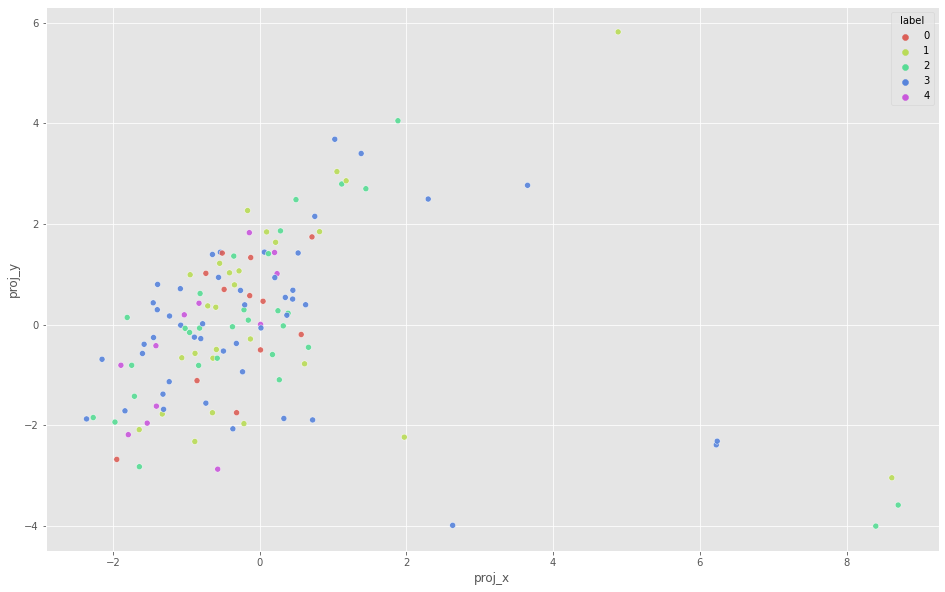

In [29]:
sent_embeddings_arr, labels_arr = get_sent_embedding_and_label(train_dataloader, model, opt.batch_size, device)
draw_embeddings(sent_embeddings_arr, labels_arr, option="pca")

the number of sample: 256


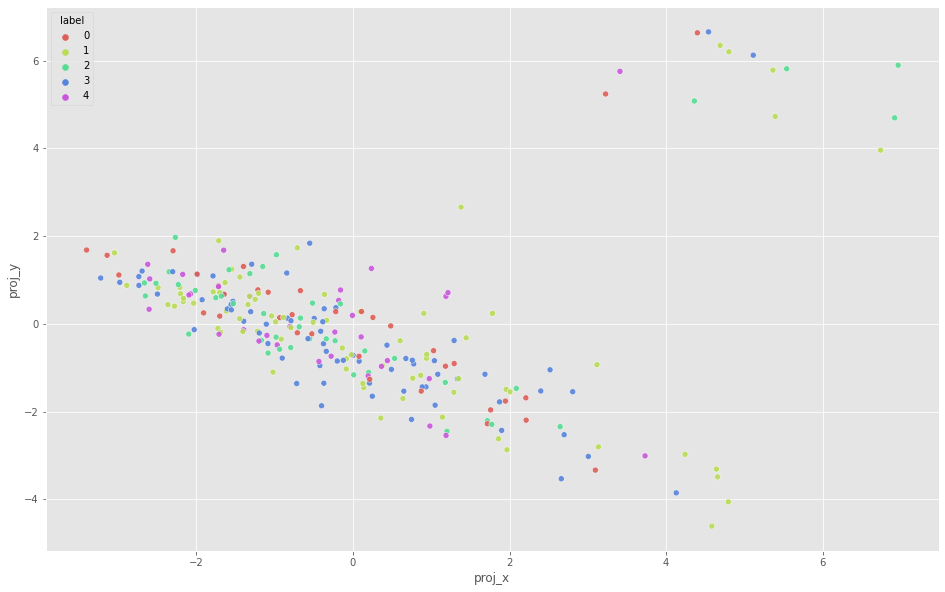

In [14]:
sent_embeddings_arr, labels_arr = get_sent_embedding_and_label(valid_dataloader, model, opt.batch_size, device)
draw_embeddings(sent_embeddings_arr, labels_arr, option="pca")

In [30]:
# Load trained model
model.to(torch.device("cpu"))
model_save_path = str(opt.save_model_path) + "/" + opt.signature +'.model'
model.load_state_dict(torch.load(model_save_path))
model.to(device)

ElectraClassifier(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

the number of sample: 128


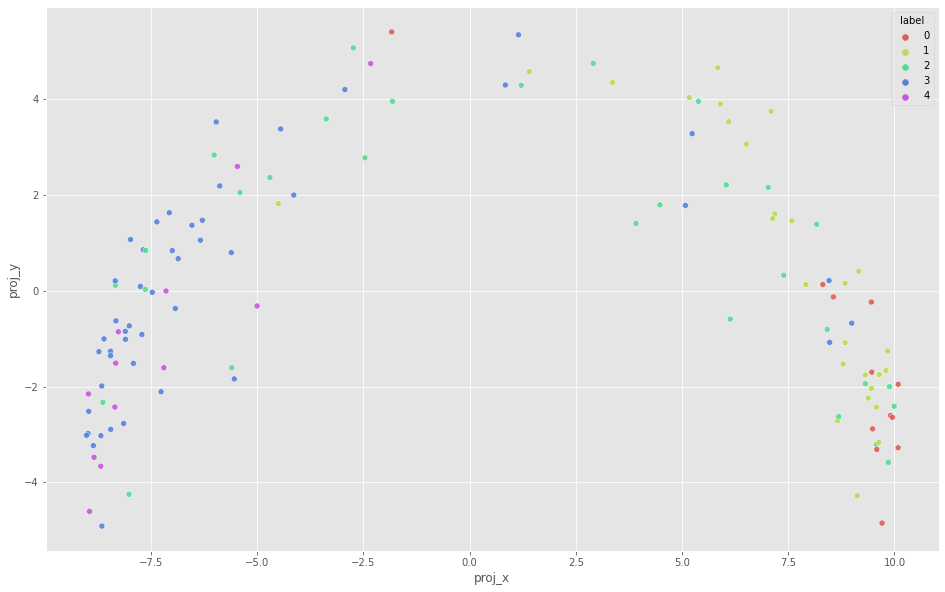

In [31]:
sent_embeddings_arr, labels_arr = get_sent_embedding_and_label(train_dataloader, model, opt.batch_size, device)
draw_embeddings(sent_embeddings_arr, labels_arr, option="pca")

the number of sample: 256


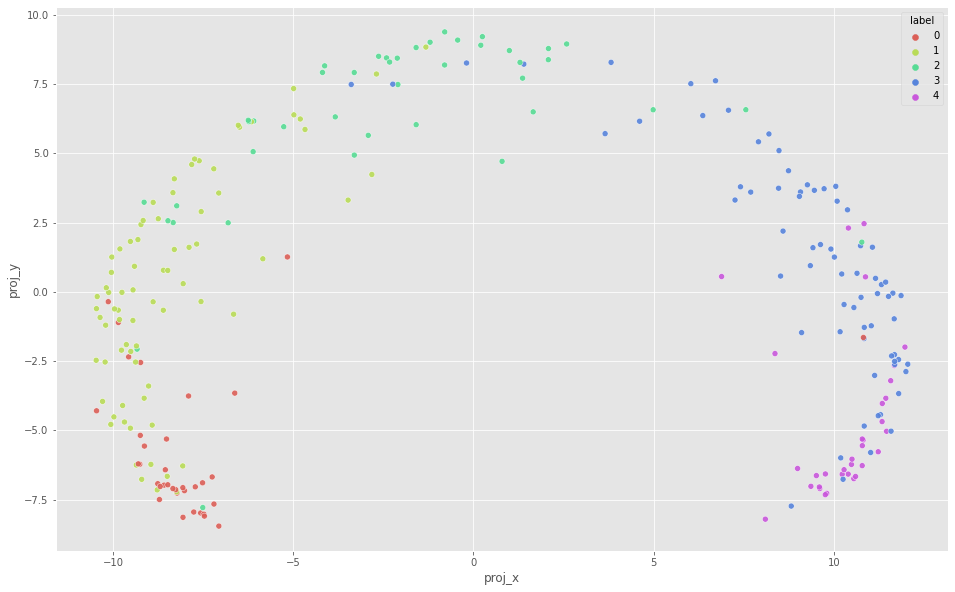

In [21]:
sent_embeddings_arr, labels_arr = get_sent_embedding_and_label(valid_dataloader, model, opt.batch_size, device)
draw_embeddings(sent_embeddings_arr, labels_arr, option="pca")

In [32]:
# Load trained model
model_save_path = str(opt.save_model_path) + "/" + opt.signature +'_full.model'
model.load_state_dict(torch.load(model_save_path))
model.to(device)

ElectraClassifier(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

the number of sample: 128


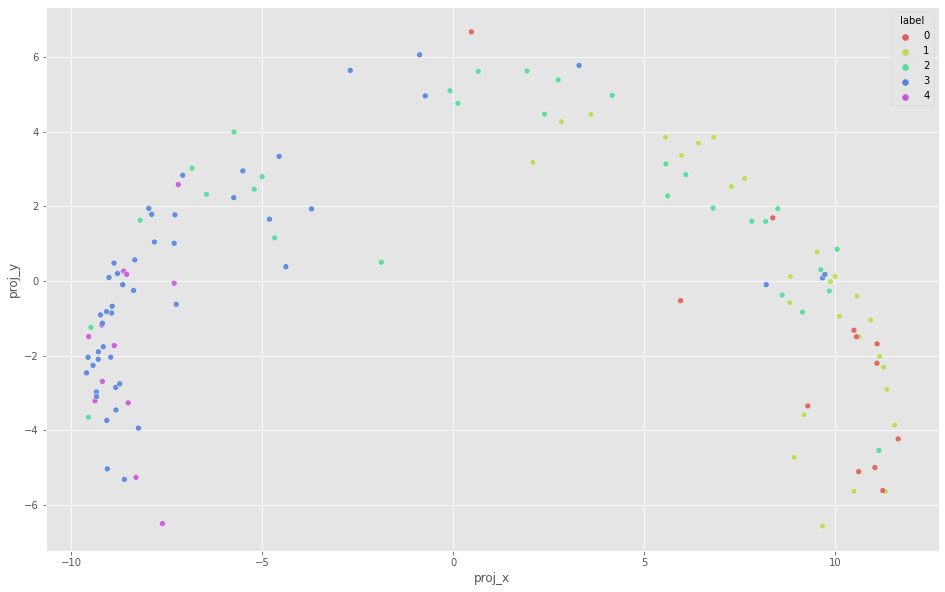

In [33]:
sent_embeddings_arr, labels_arr = get_sent_embedding_and_label(train_dataloader, model, opt.batch_size, device)
draw_embeddings(sent_embeddings_arr, labels_arr, option="pca")

the number of sample: 128


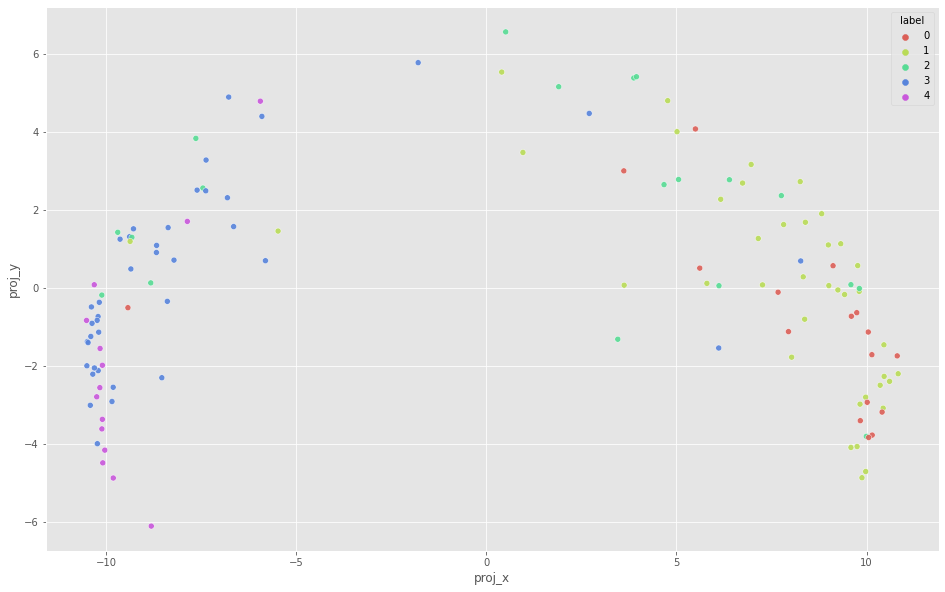

In [34]:
sent_embeddings_arr, labels_arr = get_sent_embedding_and_label(valid_dataloader, model, opt.batch_size, device)
draw_embeddings(sent_embeddings_arr, labels_arr, option="pca")